# Individual-based analysis

### Bring:
* raw genotypes in [MAP/PED format](http://pngu.mgh.harvard.edu/~purcell/plink/data.shtml)
    individual pedigree information and genotype calls
    * \*.ped file individual pedigree information and genotype calls
    * \*.map file - variant information file
   
These files can be generated by the **`populations`** program within **`Stacks`** using the "--plink" flag


### Take away:
* Set of genotypes passing filtering criteria.

### Programs used:
* [PLINK v1.9b](http://pngu.mgh.harvard.edu/~purcell/plink2/index.html)
    
### Steps

In [1]:
## Step 1
### Setup

Get the output from filter_pop_genotypes, and copy to ind_analysis results directory

In [2]:
cd /home/ipseg/Desktop/waples/chum_populations/results/batch_4/ind_analysis

/home/ipseg/Desktop/waples/chum_populations/results/batch_4/ind_analysis


In [3]:
cp /home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/non_paralogs* .

In [4]:
ls

non_paralogs.bed           non_paralogs.ibc               non_paralogs.ped
non_paralogs.bim           non_paralogs.imiss             non_paralogs.raw
non_paralogs.cluster1      non_paralogs.IND_md_poistions  non_paralogs.ref
non_paralogs.cluster2      non_paralogs.lgen              non_paralogs.rel
non_paralogs.cluster3      non_paralogs.list              non_paralogs.rel.id
non_paralogs.eigenval      non_paralogs.lmiss             non_paralogs.snplist
non_paralogs.eigenvec      non_paralogs.log               non_paralogs.traw
non_paralogs.eigenvec.var  non_paralogs.map               plink.eigenval
non_paralogs.fam           non_paralogs.mdist             plink.eigenvec
non_paralogs.frq.strat     non_paralogs.mdist.id          plink.log
non_paralogs.frqx          non_paralogs.mds               plink.nosex
non_paralogs.fst           non_paralogs.mds.eigvals
non_paralogs.het           non_paralogs.nosex


In [5]:
univseral_plink_commands = "--allow-extra-chr --allow-no-sex --autosome-num 50"

### calculate the number of indidivuals and loci retained

In [6]:
%%capture shell_output_fam
!wc -l < non_paralogs.fam

In [7]:
INDS_RETAINED = int(shell_output_fam.stdout)
print(INDS_RETAINED)

174


In [8]:
%%capture shell_output_bim
!wc -l < non_paralogs.bim

In [9]:
LOCI_RETAINED = shell_output_bim.stdout
print(LOCI_RETAINED)

12399



### PCA
This will extract the top X principal components of the variance-standardized relationship matrix. 

X = (Number of individuals - 1)

For PCA, also try the [EIGENSOFT](ftp://ftp.broadinstitute.org/EIGENSOFT/) package

In [10]:
!plink --bfile non_paralogs {univseral_plink_commands} --make-rel --pca {INDS_RETAINED-1} header tabs var-wts --out non_paralogs

PLINK v1.90b3q 64-bit (29 May 2015)        https://www.cog-genomics.org/plink2
(C) 2005-2015 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to non_paralogs.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --autosome-num 50
  --bfile non_paralogs
  --make-rel
  --out non_paralogs
  --pca 173 header tabs var-wts

32127 MB RAM detected; reserving 16063 MB for main workspace.
12399 variants loaded from .bim file.
174 samples (0 males, 0 females, 174 ambiguous) loaded from .fam.
Ambiguous sex IDs written to non_paralogs.nosex .
Using up to 8 threads (change this with --threads).
Before main variant filters, 174 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49

In [11]:
# plot PCA here
%matplotlib inline
import pandas as pd
import seaborn as sns
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")
pop_colors = ['purply pink', 'golden', 'leaf green', 'blood', 'vomit', 'primary blue', 
              'bright sky blue', 'dark cyan', 'grey', 'red']

In [12]:
pca_eigenvec = pd.read_csv('non_paralogs.eigenvec', sep = "\t")
pca_eigenvec['SILLI'] = [xx.split('_')[0] for xx in pca_eigenvec['IID']]
pca_eigenval = pd.read_csv('non_paralogs.eigenval', sep = "\t", header = None)
pca_eigenval.columns = ['eigengval']
pca_eigenval['fraction_var'] = pca_eigenval['eigengval']/sum(pca_eigenval['eigengval'])
#pca_eigenvec.head()

In [13]:
POPINFO_file = '/home/ipseg/Desktop/waples/chum_populations/data/POPINFO.txt'
POPINFO = pd.read_csv(POPINFO_file, sep = "\t", header = 0)
pca_eigenvec = pd.merge(pca_eigenvec, POPINFO)
#pca_eigenvec.head(40)

#### Write out for shiny app

In [14]:
pca_eigenvec.to_csv('/home/ipseg/Desktop/waples/chum_populations/plots/shiny/chum_mds/chum.pca.evec', 
                       index = None, sep = '\t')
pca_eigenval.to_csv('/home/ipseg/Desktop/waples/chum_populations/plots/shiny/chum_mds/chum.pca.eval', 
                       index = None, sep = '\t')

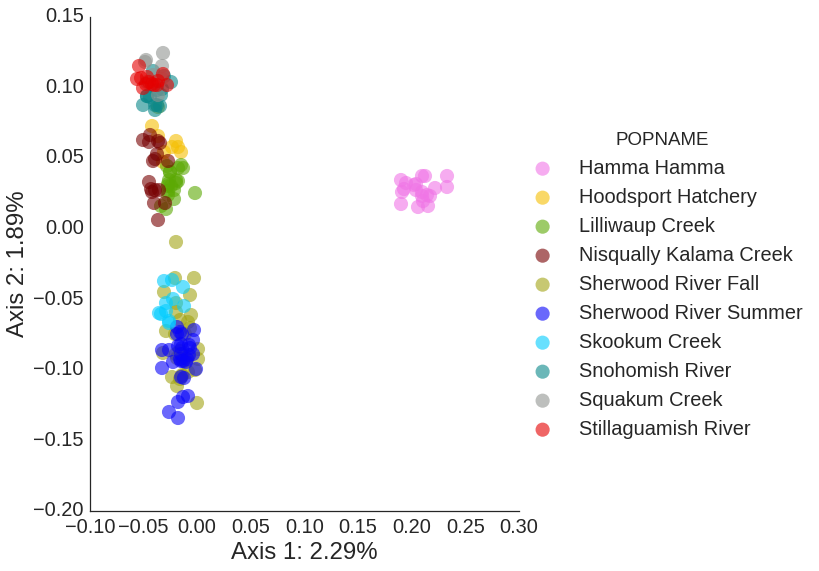

In [15]:
figsize(16, 8)
sns.lmplot('PC1', 'PC2', data = pca_eigenvec, hue = 'POPNAME',  palette=sns.xkcd_palette(pop_colors), 
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6} )
sns.despine()
plt.xlabel('Axis 1: {:.2f}%'.format(pca_eigenval['fraction_var'][0]*100.),fontsize = 24)
plt.ylabel('Axis 2: {:.2f}%'.format(pca_eigenval['fraction_var'][1]*100.),fontsize = 24)
plt.show()

### SNP loadings
## loadings of each variant on each PC axis are included in final.eigenvec.var

In [16]:
PCA_loadings = pd.read_csv('non_paralogs.eigenvec.var', sep = "\t")

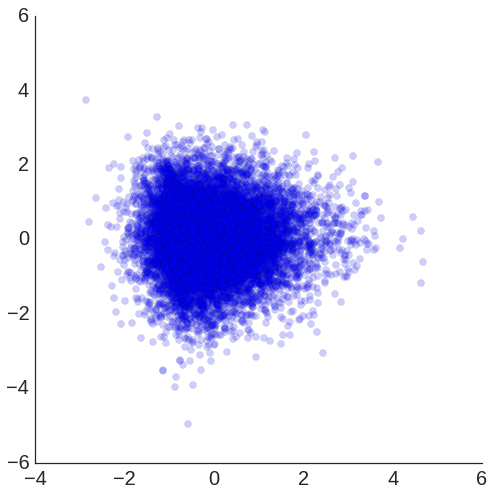

In [17]:
figsize(8, 8)
plt.scatter(PCA_loadings['PC1'], PCA_loadings['PC2'], s= 50, alpha=.2)
sns.despine()
plt.show()

### Identity by state (IBS) distance, also called 'allele sharing distance'

In [18]:
!plink --bfile non_paralogs {univseral_plink_commands} --distance square flat-missing 1-ibs --out non_paralogs

PLINK v1.90b3q 64-bit (29 May 2015)        https://www.cog-genomics.org/plink2
(C) 2005-2015 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to non_paralogs.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --autosome-num 50
  --bfile non_paralogs
  --distance square flat-missing 1-ibs
  --out non_paralogs

32127 MB RAM detected; reserving 16063 MB for main workspace.
12399 variants loaded from .bim file.
174 samples (0 males, 0 females, 174 ambiguous) loaded from .fam.
Ambiguous sex IDs written to non_paralogs.nosex .
Using up to 8 threads (change this with --threads).
Before main variant filters, 174 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50

# Multidimensional scaling
here are two ways to do MDS on genetic data

See my interactive shiny plots of MDS [here](http://rwaples.shinyapps.io/chum_mds)

### in PLINK
using --cluster --mds-plot

In [19]:
!plink --bfile non_paralogs {univseral_plink_commands} --cluster --mds-plot 3  eigvals --out non_paralogs

PLINK v1.90b3q 64-bit (29 May 2015)        https://www.cog-genomics.org/plink2
(C) 2005-2015 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to non_paralogs.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --autosome-num 50
  --bfile non_paralogs
  --cluster
  --mds-plot 3 eigvals
  --out non_paralogs

32127 MB RAM detected; reserving 16063 MB for main workspace.
12399 variants loaded from .bim file.
174 samples (0 males, 0 females, 174 ambiguous) loaded from .fam.
Ambiguous sex IDs written to non_paralogs.nosex .
Using up to 8 threads (change this with --threads).
Before main variant filters, 174 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%

### in Python

In [20]:
## taken from http://www.nervouscomputer.com/hfs/cmdscale-in-python/
## Credit due to Francis Song - francis.song@nyu.edu
from __future__ import division
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

In [21]:
ind_dist_matrix = np.fromfile('non_paralogs.mdist', sep = "\t").reshape((INDS_RETAINED, INDS_RETAINED))
ind_dist_matrix.shape

(174, 174)

In [22]:
configuration, eigenvalues = cmdscale(ind_dist_matrix)

In [23]:
configuration[:,1].shape

(174,)

In [24]:
percent_var = eigenvalues/ (sum(eigenvalues))

#### load POPINFO to provide coloration.

In [25]:
POPINFO_file = '/home/ipseg/Desktop/waples/chum_populations/data/POPINFO.txt'
POPINFO = pd.read_csv(POPINFO_file, sep = "\t", header = 0)

ind_IDs_file = '/home/ipseg/Desktop/waples/chum_populations/results/batch_4/ind_analysis/non_paralogs.mdist.id'
ind_IDs = pd.read_csv(ind_IDs_file, sep = "\t", header = None)
ind_IDs.columns = ('POP', 'IND')
ind_IDs['SILLI'] = [xx.split('_')[0] for xx in ind_IDs['IND']]

In [26]:
INDINFO = pd.merge(ind_IDs, POPINFO, on = 'SILLI')

In [27]:
# put data in long form here
md_poistions = pd.DataFrame(configuration)
md_poistions.columns = ['dim_'+str(xx+1) for xx in md_poistions.columns]
IND_md_poistions = pd.merge(INDINFO, md_poistions, left_index= True, right_index = True)

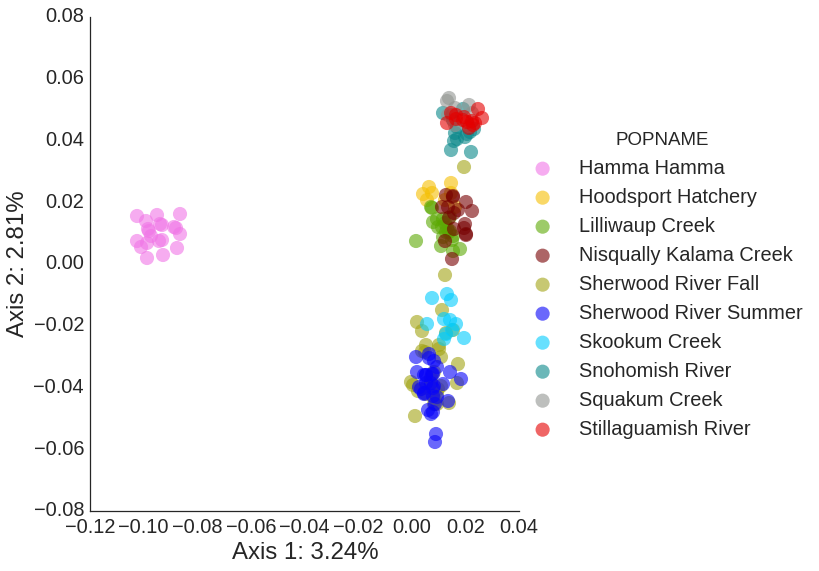

In [28]:
%matplotlib inline
figsize(16, 8)
sns.lmplot('dim_1', 'dim_2', data = IND_md_poistions, hue = 'POPNAME',  palette=sns.xkcd_palette(pop_colors), 
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6 })
sns.despine()
plt.xlabel('Axis 1: {:.2f}%'.format(percent_var[0]*100.),fontsize = 24) 
plt.ylabel('Axis 2: {:.2f}%'.format(percent_var[1]*100.),fontsize = 24) 
plt.show()

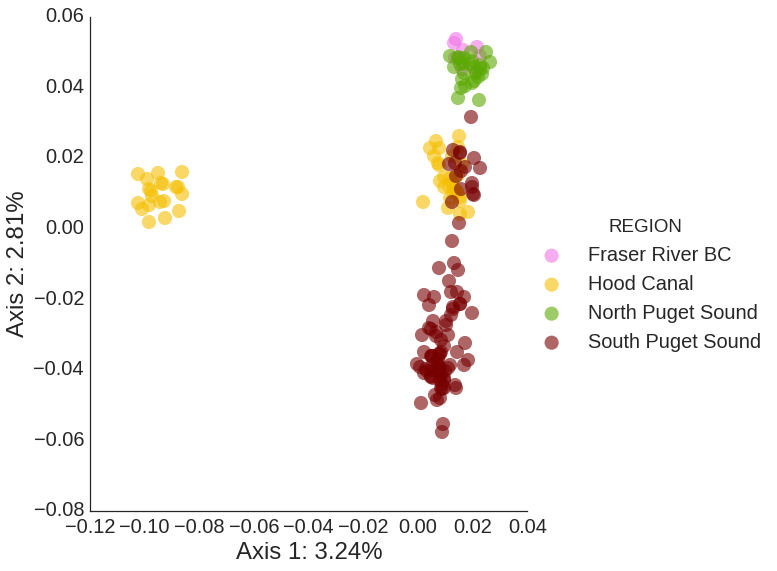

In [29]:
%matplotlib inline
figsize(16, 8)
sns.lmplot('dim_1', 'dim_2', data = IND_md_poistions, hue = 'REGION',  palette=sns.xkcd_palette(pop_colors), 
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6 })
sns.despine()
plt.xlabel('Axis 1: {:.2f}%'.format(percent_var[0]*100.),fontsize = 24) 
plt.ylabel('Axis 2: {:.2f}%'.format(percent_var[1]*100.),fontsize = 24) 
plt.show()

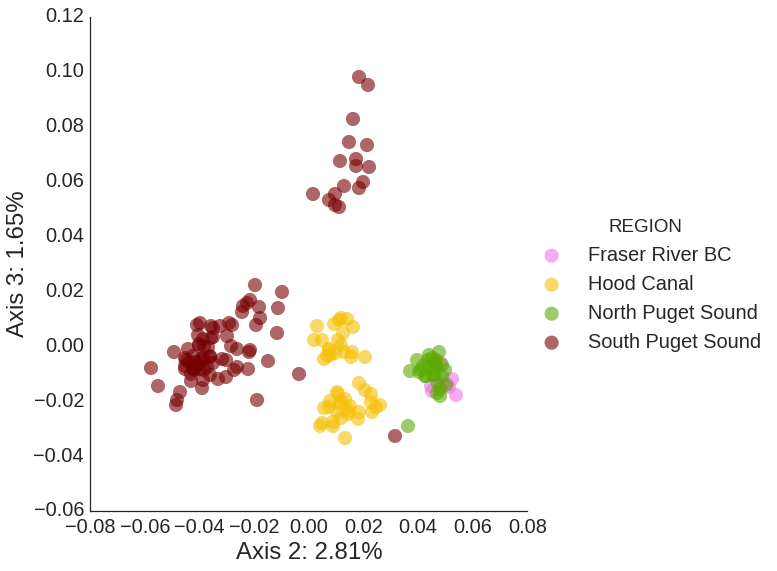

In [30]:
%matplotlib inline
figsize(16, 8)
sns.lmplot('dim_2', 'dim_3', data = IND_md_poistions, hue = 'REGION',  palette=sns.xkcd_palette(pop_colors), 
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6 })
sns.despine()
plt.xlabel('Axis 2: {:.2f}%'.format(percent_var[1]*100.),fontsize = 24) 
plt.ylabel('Axis 3: {:.2f}%'.format(percent_var[2]*100.),fontsize = 24) 
plt.show()

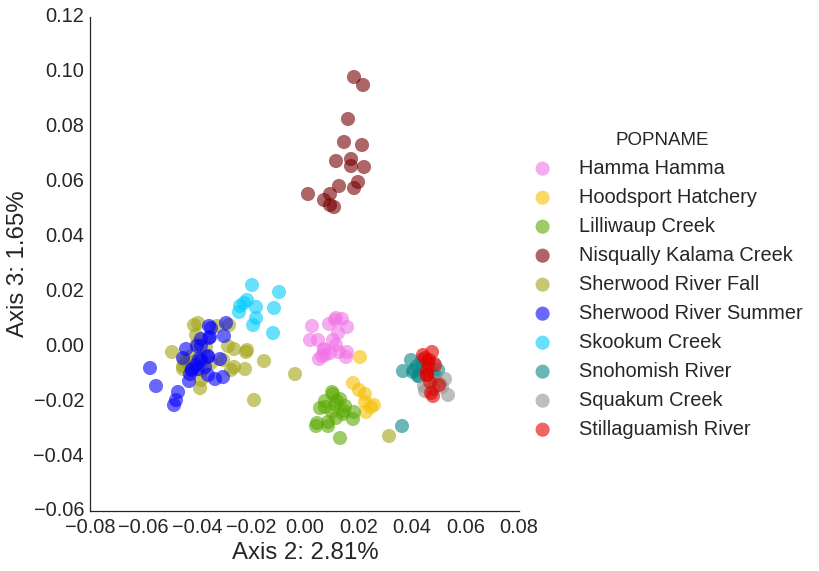

In [31]:
%matplotlib inline
figsize(16, 8)
sns.lmplot('dim_2', 'dim_3', data = IND_md_poistions, hue = 'POPNAME',  palette=sns.xkcd_palette(pop_colors), 
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6 })
sns.despine()
plt.xlabel('Axis 2: {:.2f}%'.format(percent_var[1]*100.),fontsize = 24) 
plt.ylabel('Axis 3: {:.2f}%'.format(percent_var[2]*100.),fontsize = 24) 
plt.show()

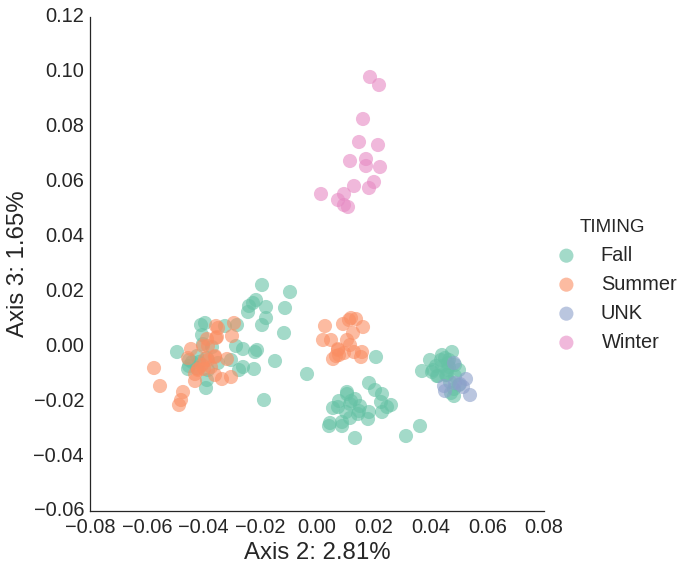

In [32]:
%matplotlib inline

figsize(16, 8)
sns.lmplot('dim_2', 'dim_3', data = IND_md_poistions, hue = 'TIMING',  palette='Set2', 
           fit_reg=False, size = 8, scatter_kws={"s": 200., 'alpha': .6 })
sns.despine()
plt.xlabel('Axis 2: {:.2f}%'.format(percent_var[1]*100.),fontsize = 24) 
plt.ylabel('Axis 3: {:.2f}%'.format(percent_var[2]*100.),fontsize = 24) 
plt.show()

## TODO make an interactive plot
-- chose the axes to plot
and the color scheme

In [33]:
IND_md_poistions.to_csv('non_paralogs.IND_md_poistions', index = False, sep = "\t")

In [34]:
pwd

u'/home/ipseg/Desktop/waples/chum_populations/results/batch_4/ind_analysis'